In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import seaborn as sns
from scipy import stats

In [2]:

def remove_tags(sequence):
    colors = ["red", "green"]
    sequence = sequence.replace("</font>", "")
    for color in colors:
        sequence = sequence.replace(f"<font color = {color}>", "")
    return sequence


In [3]:

## result files
files = os.listdir("adv_results/")
datasets = {}
for file in files:
    if file != '.DS_Store':
        df = pd.read_csv(f"adv_results/{file}")
        file = file.replace(".csv","")
        datasets[file] = {
           'original_text': [remove_tags(text) for text in df['original_text'].values.tolist()], 
           'perturbed_text': [remove_tags(text) for text in df['perturbed_text'].values.tolist()],
            'num_queries': df['num_queries'].values.tolist(),
            'original_text_len': [len(remove_tags(text)) for text in df['original_text'].values.tolist()], 
        }

In [4]:
datasets.keys()

dict_keys(['germeval_baseline_whitebox_wordlevel', 'germeval_whitebox_charlevel', 'germeval_whitebox_wordlevel', 'hasoc_baseline_whitebox_wordlevel', 'hasoc_whitebox_wordlevel', 'hasoc_whitebox_charlevel'])

In [5]:
datasets_fuzzy_char = ['germeval_baseline_whitebox_wordlevel', 'germeval_whitebox_charlevel', 'germeval_whitebox_wordlevel', 'hasoc_baseline_whitebox_wordlevel', 'hasoc_whitebox_wordlevel', 'hasoc_whitebox_charlevel']
fuzzy_results = []
for dataset in datasets_fuzzy_char:
    #fuzzy_results[dataset] = 
    for idx, _ in enumerate(datasets[dataset]['original_text']):
        score = fuzz.ratio(datasets[dataset]['original_text'][idx], datasets[dataset]['perturbed_text'][idx])/100
        fuzzy_results.append({
            'score':score,
            'dataset': dataset.split('_')[0],
            'attack': " ".join(dataset.split('_')[1:]).replace(" whitebox ", " ")
        })

In [6]:
datasets_fuzzy_char

['germeval_baseline_whitebox_wordlevel',
 'germeval_whitebox_charlevel',
 'germeval_whitebox_wordlevel',
 'hasoc_baseline_whitebox_wordlevel',
 'hasoc_whitebox_wordlevel',
 'hasoc_whitebox_charlevel']

In [7]:
corr_df.sort_values(by='pearson r')

NameError: name 'corr_df' is not defined

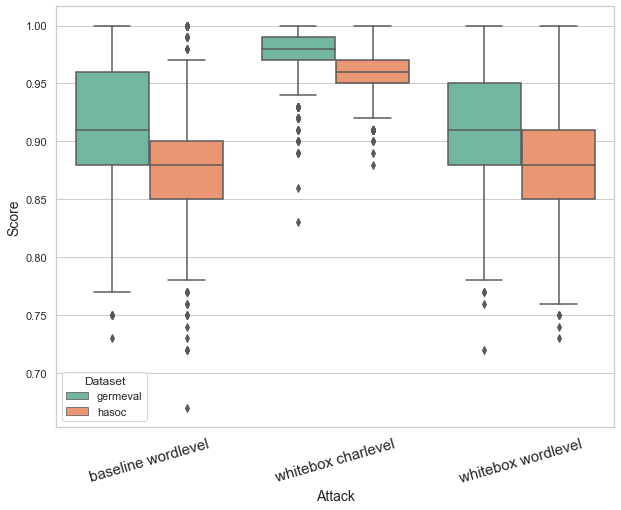

In [42]:
fuzzy_df = pd.DataFrame(fuzzy_results)
a4_dims = (10, 8)
plt.rcParams.update({'font.size': 25})
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
ax.tick_params(axis='x', rotation=16, labelsize=15)
#ax = sns.boxplot(ax=ax, x="attack", y="score", hue="dataset",
 #                data=fuzzy_df,palette="Set2" )
    #markers=["^", "o"], linestyles=["-", "--"], kind="point",,height=4.27, aspect=5.7/4.27
#plt.rcParams['figure.figsize'] = 42,33.27
g = sns.boxplot(ax=ax, x="attack", y="score", hue="dataset",palette="Set2", data=fuzzy_df  )#height=8.27, aspect=11.7/8.27
plt.ylabel('Score',fontsize=14)
plt.xlabel('Attack',fontsize=14)
plt.legend(title='Dataset', loc='lower left')
#g.set_xticklabels(rotation=30)
plt.subplots_adjust(bottom=0.15)
plt.savefig("edit_distance_attacks.pdf",dpi=300, bbox_inches = "tight")
#g.figure.savefig("queries_len_corr")

In [15]:
plt.legend?

In [ ]:

#palette={"male": "g", "female": "m"},

In [8]:
datasets_corr = ['germeval_baseline_whitebox_wordlevel', 'germeval_whitebox_charlevel', 'germeval_whitebox_wordlevel', 'hasoc_baseline_whitebox_wordlevel', 'hasoc_whitebox_wordlevel', 'hasoc_whitebox_charlevel']
corr_results = []
for dataset in datasets_corr:
    points_a, points_b = [], []
    for idx, _ in enumerate(datasets[dataset]['original_text']):
        points_a.append(datasets[dataset]["num_queries"][idx])
        points_b.append(datasets[dataset]["original_text_len"][idx])
        
    
    corr_results.append({
        'pearson r':stats.pearsonr(points_a, points_b)[0],
        'dataset': dataset.split('_')[0],
        'attack': " ".join(dataset.split('_')[1:]).replace(" whitebox ", " ")
    })

In [9]:
corr_df = pd.DataFrame(corr_results)

In [ ]:
plt.rcParams['figure.figsize'] = 42,33.27
g = sns.catplot(x="attack", y="pearson r", hue="dataset",markers=["^", "o"], linestyles=["-", "--"],
            kind="point", palette="Set2",legend=False, data=corr_df ,height=4.27, aspect=5.7/4.27 )#height=8.27, aspect=11.7/8.27
plt.ylabel('Pearson $r$')
plt.xlabel('Attack')
plt.legend(title='Dataset', loc='lower left')
g.set_xticklabels(rotation=30)
plt.subplots_adjust(bottom=0.15)
plt.savefig("queries_len_corr.pdf",dpi=300, bbox_inches = "tight")

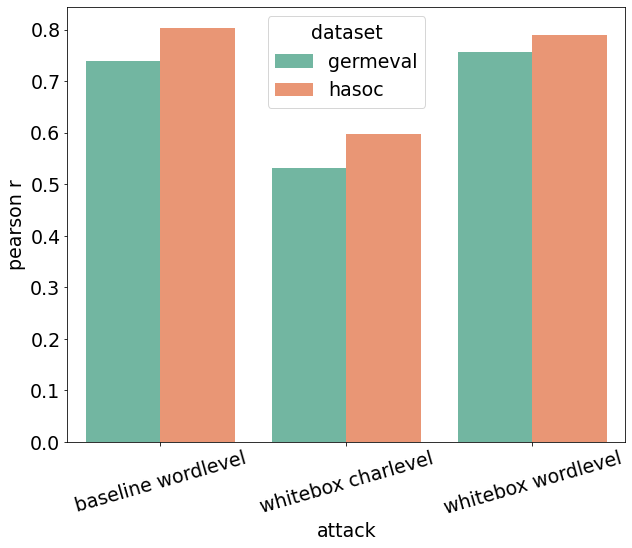

In [10]:
a4_dims = (10, 8)
plt.rcParams.update({'font.size': 19})

fig, ax = plt.subplots(figsize=a4_dims)
ax.tick_params(axis='x', rotation=16)
ax.tick_params(axis='x', rotation=16)
ax = sns.barplot(ax=ax, x="attack", y="pearson r", hue="dataset",
                 data=corr_df,palette="Set2"  )
#g = sns.factorplot(x="X_Axis", y="vals", hue='cols', data=dfm)
plt.savefig("queries_len_corr.pdf")

In [ ]:
corr_df.T

In [ ]:
corr_df.set_index(['attack']).plot(kind='bar', stacked=True)

In [ ]:
corr_df.sort_values(by=['original_text_len'], inplace=True)
corr_df.head()


In [ ]:
corr_df[corr_df['full']=='germeval_whitebox_charlevel']

In [ ]:


y1 = corr_df[corr_df['full']=='germeval_whitebox_charlevel'].original_text_len.values.tolist()
y2 = corr_df[corr_df['full']=='germeval_whitebox_charlevel'].num_queries.values.tolist()

y3 = corr_df[corr_df['full']=='hasoc_whitebox_charlevel'].original_text_len.values.tolist()
y4 = corr_df[corr_df['full']=='hasoc_whitebox_charlevel'].num_queries.values.tolist()
"""
y3 = [32, 34, 35, 38, 39, 33, 35, 36]
y4 = [42, 44, 45, 48, 49, 43, 45, 46]
y5 = [52, 54, 55, 58, 59, 53, 55, 56]"""
 
 
# Plot lines with different marker sizes
plt.plot(y1, y2, label = 'Y1-Y2', lw=2, marker='s') # square
plt.plot(y3, y4, label = 'Y1-Y3', lw=2, marker='^') # triangle
"""
plt.plot(y1, y4, label = 'Y1-Y4', lw=2, marker='o', ms=10) # circle
plt.plot(y1, y5, label = 'Y1-Y5', lw=2, marker='D', ms=10) # diamond
plt.plot(y2, y5, label = 'Y2-Y5', lw=2, marker='P', ms=10) # filled plus sign"""
 
plt.legend()
plt.show()